#### Install Numpy And Pandas

In [2]:
import numpy as numpy
import pandas as pandas
import matplotlib.pyplot as plt

#### Load CSV menjadi dataframe dengan menggunakan pandas

In [3]:
#load csv dengan menggunakan pandas
londonDataFrame = pandas.read_csv('dataset/london_crime_by_lsoa.csv')

In [4]:
#set variable yang dibutuhkan
years = londonDataFrame.groupby("year").count().index #ini untuk list tahun yang ada pada dataframe
months = londonDataFrame.groupby("month").count().index #ini untuk list bulan yang ada pada dataframe
boroughs = londonDataFrame.groupby("borough").count().index #ini untuk list data Borough yang ada pada dataframe
major_categories = londonDataFrame.groupby("major_category").count().index #ini untuk list data major category yang ada pada dataframe
minor_categories = londonDataFrame.groupby("minor_category").count().index #ini untuk list data minor category yang ada pada dataframe

<AxesSubplot:title={'center':'Data kasus tiap bulan/tahun'}, ylabel='total Crime'>

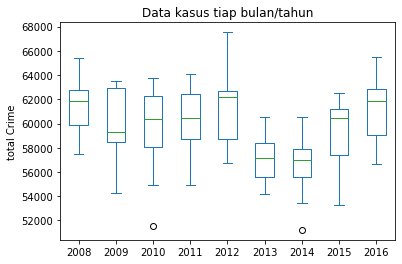

In [24]:
temp = londonDataFrame.groupby(["year", "month"])["value"].sum()
# boxplot[boxplot.index["year"] == 2008]
majorcase = pandas.DataFrame()
for i in years:
    majorcase[i] = temp.T.loc[i]
majorcase.plot(kind="box", title="Data kasus tiap bulan/tahun", xlabel="Year", ylabel="total Crime")

<AxesSubplot:title={'center':'Total Case per Year'}, xlabel='Year', ylabel='total Crime'>

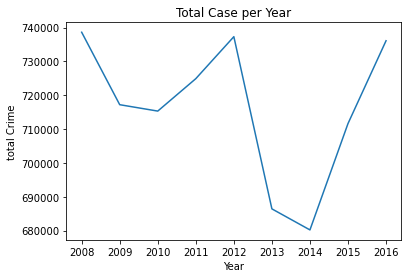

In [6]:
#Mendapatkan Rata rata kasus tiap tahun selama tahun 2008 - 2016
df_TotalCasePerYear = londonDataFrame.groupby("year")["value"].sum() #total Case Series from 2008 - 2016
meanCaseperYear = londonDataFrame.groupby("year")["value"].sum().mean(axis=0) #716417.5
mean_series = pandas.Series(716417.5, index=df_TotalCasePerYear.index)
df_TotalCasePerYear.plot(kind="line", title="Total Case per Year", xlabel="Year", ylabel="total Crime")
# mean_series.plot(kind="line")


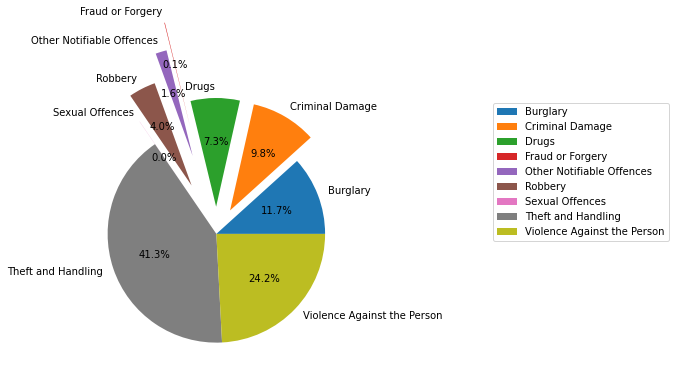

In [7]:
#get each minor by Major Category
majorGroup = londonDataFrame.groupby(["major_category"])["value"].sum()
majorGroup.plot(kind="pie", autopct="%.1f%%", explode=[0,0.25,0.25,1,0.75,0.5,0.25,0,0] ,legend=True, ylabel="", rot=30, figsize=(20,5))
plt.legend(bbox_to_anchor=(1.5, 1.0))
plt.show()

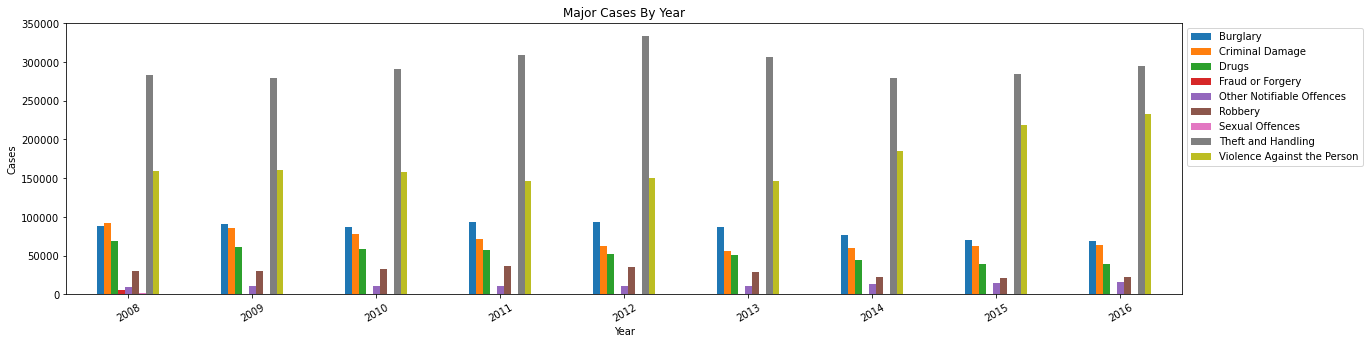

In [8]:
#membuat dataframe untuk mengetahui perkembangan tahunan dari tindak kriminal di london berdasarkan major_category
df_yearlyCases = pandas.DataFrame()
for i in years:
    df_yearlyCases[i] = londonDataFrame[londonDataFrame["year"] == i].groupby("major_category")["value"].sum()
df_yearlyCases = df_yearlyCases.T
# df_yearlyCases["total"] = df_yearlyCases.sum(axis=1)
df_yearlyCases.plot(kind="bar", title="Major Cases By Year", rot=30, xlabel="Year", ylabel="Cases", legend=True, figsize=(20,5))
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [9]:
df_monthlyMajorCases = pandas.DataFrame()
for i in years:
    for j in months:
        df_monthlyMajorCases[f"{i}-{j}"] = londonDataFrame[(londonDataFrame["year"] == i) & (londonDataFrame["month"] == j)].groupby("major_category")["value"].sum()
df_monthlyMajorCases = df_monthlyMajorCases.T
# df_monthlyMajorCases["total"] = df_monthlyMajorCases.sum(axis=1)

C:\Users\Fiki\AppData\Local\Temp/ipykernel_7904/515667619.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthlyMajorCases[f"{i}-{j}"] = londonDataFrame[(londonDataFrame["year"] == i) & (londonDataFrame["month"] == j)].groupby("major_category")["value"].sum()


In [10]:
df_monthlyMinorCases = pandas.DataFrame()
for i in years:
    for j in months:
        df_monthlyMinorCases[f"{i}-{j}"] = londonDataFrame[(londonDataFrame["year"] == i) & (londonDataFrame["month"] == j)].groupby("minor_category")["value"].sum()
df_monthlyMinorCases = df_monthlyMinorCases.T
# df_monthlyMinorCases["total"] = df_monthlyMinorCases.sum(axis=1)

C:\Users\Fiki\AppData\Local\Temp/ipykernel_7904/3840349164.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_monthlyMinorCases[f"{i}-{j}"] = londonDataFrame[(londonDataFrame["year"] == i) & (londonDataFrame["month"] == j)].groupby("minor_category")["value"].sum()


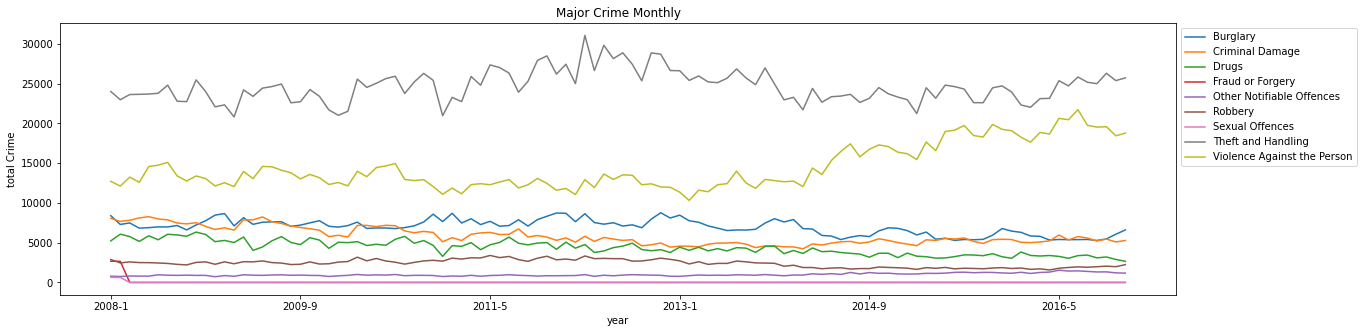

In [11]:
for i in major_categories:
    df_monthlyMajorCases[i].plot(title="Major Crime Monthly", kind="line", xlabel="year", ylabel="total Crime", legend=True, figsize=(20,5))
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

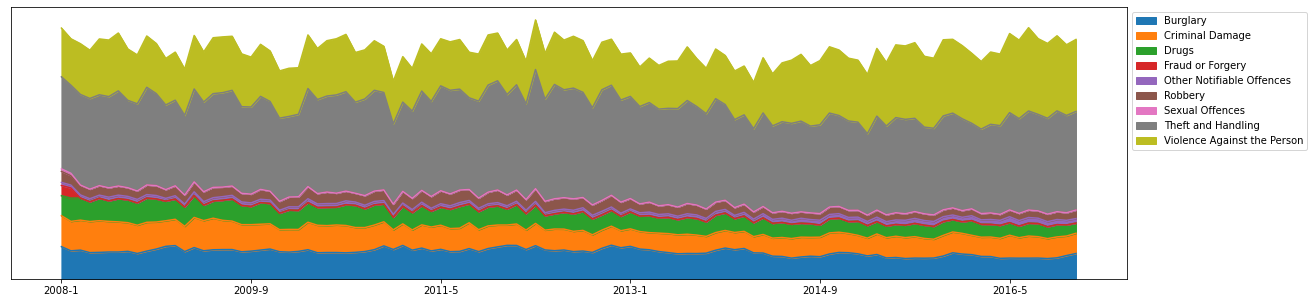

In [12]:
# df_monthlyMajorCases
df_monthlyMajorCases.plot(kind="area", figsize=(20,5), yticks=[])
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

<AxesSubplot:title={'center':'Jumlah total kejahatan berdasarkan Minor Category selama 8 Tahun'}, ylabel='Minor Category'>

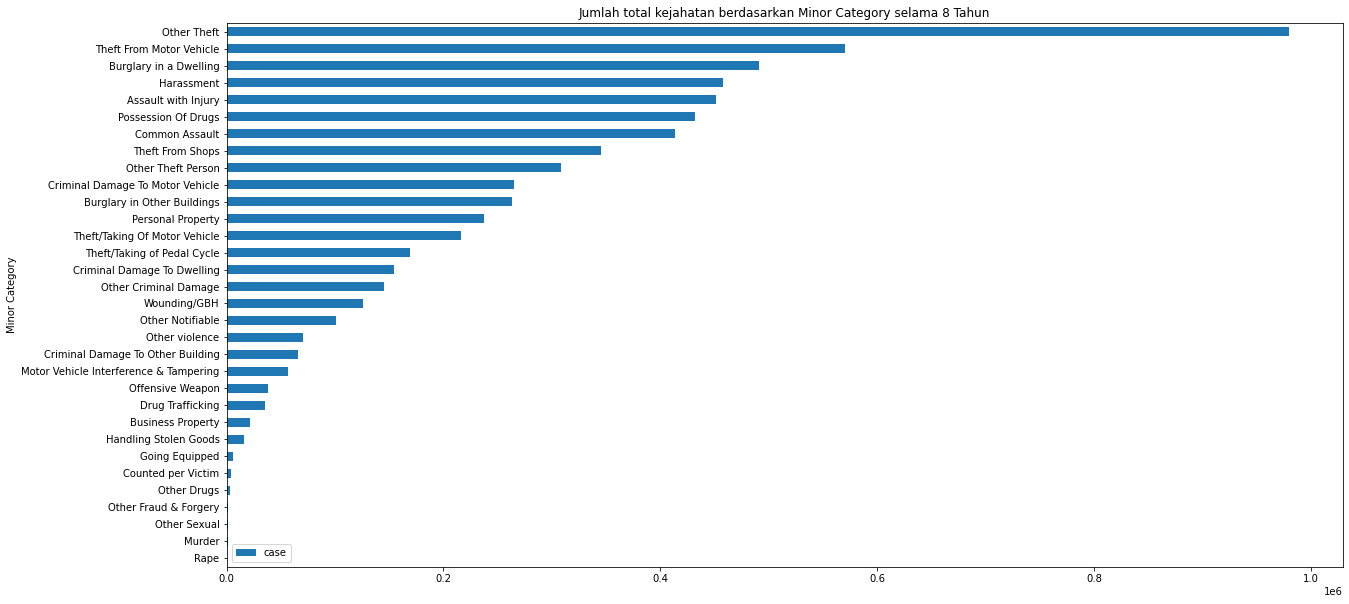

In [13]:
#mendapatkan data total kasus minor_category dari 2008 - 2016
df_TotalMinorCases = pandas.DataFrame()

# df_monthlyMinorCases = df_monthlyMinorCases.T
df_TotalMinorCases["case"] = df_monthlyMinorCases.T.sum(axis=1)
df_TotalMinorCases.sort_values(by="case", inplace=True)
df_TotalMinorCases.plot(title="Jumlah total kejahatan berdasarkan Minor Category selama 8 Tahun", kind="barh", xlabel="Minor Category", ylabel="Total Crime Occured by Value", legend=True, figsize=(20,10))

In [14]:
# df_monthlyMinorCases['total'].plot(title="Common Assault crime Monthly", kind="bar", xlabel="year", ylabel="total Crime", legend=True, figsize=(20,10))

## <b> Theft And Handling Case Analysis</b>

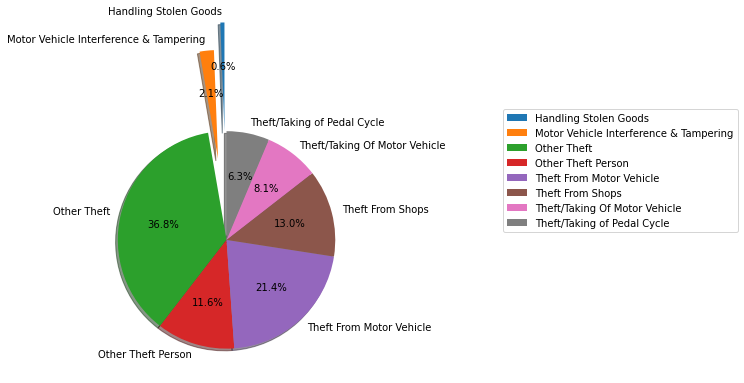

In [15]:
#get the total theft and handling case from 2008 - 2016
df_theftAndHandling = londonDataFrame[londonDataFrame["major_category"] == "Theft and Handling"]
theftAndHandling_total = df_theftAndHandling.loc[:, "value"].sum() #2661861 Cases
srs_theftAndHandling = df_theftAndHandling.groupby("minor_category")["value"].sum()
srs_theftAndHandling.plot(kind="pie", autopct="%.1f%%",legend=True, startangle=90, shadow=True, explode=[1,0.75,0,0,0,0,0,0], ylabel="", rot=45, figsize=(20,5))
plt.legend(bbox_to_anchor=(1.5, 1.0))
plt.show()

## <b>Burglary Category Case Analysis</b>

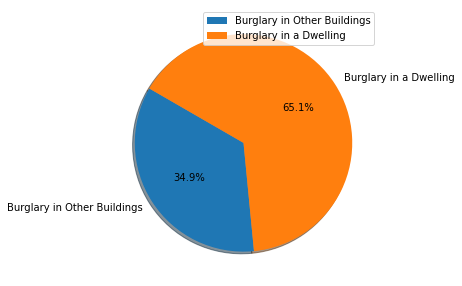

In [16]:
#get the total theft and handling case from 2008 - 2016
df_burglary = londonDataFrame[londonDataFrame["major_category"] == "Burglary"]
burglary_total = df_burglary.loc[:, "value"].sum() #754293 Cases
srs_burglary = df_burglary.groupby("minor_category")["value"].sum()
srs_burglary.plot(kind="pie", autopct="%.1f%%",legend=True, startangle=150, shadow=True, ylabel="", rot=45, figsize=(20,5))
# plt.legend(bbox_to_anchor=(0.2, 1.0))
plt.show()

## <b>Violence Againts the Person Case Analysis</b>

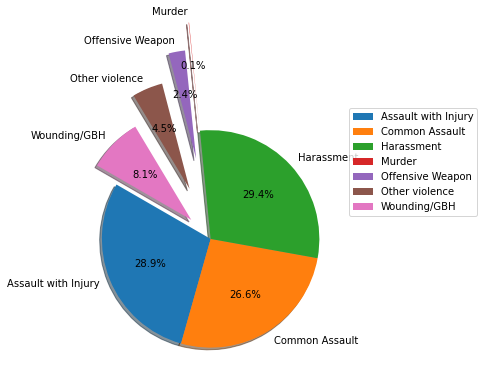

In [17]:
#get the total Violence againts the person case from 2008 - 2016
df_violence = londonDataFrame[londonDataFrame["major_category"] == "Violence Against the Person"]
violence_total = df_violence.loc[:, "value"].sum() #2661861 Cases
srs_violence = df_violence.groupby("minor_category")["value"].sum()
srs_violence.plot(kind="pie", autopct="%.1f%%",legend=True, startangle=150, explode=[0,0,0,1,0.75,0.5,0.25], shadow=True, ylabel="", rot=45, figsize=(20,5))
plt.legend(bbox_to_anchor=(1.5, 1.0))
plt.show()

## <b>Borough Analisys about Thief And Handling Case</b>

borough
Camden    140596
Name: value, dtype: int64

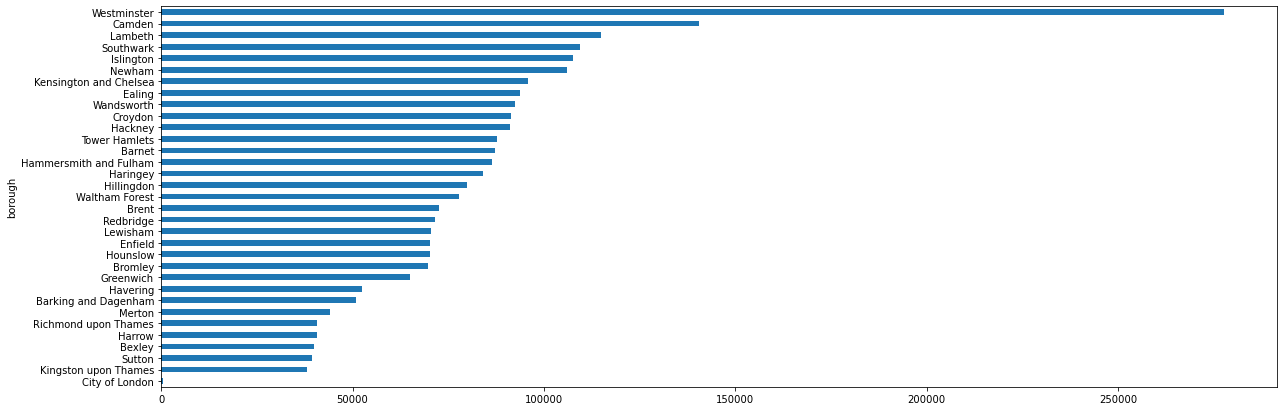

In [18]:
# Analisa jumlah kasus tindak pencurian pada masing-masing distrik 
boroughTheftCase = df_theftAndHandling.groupby("borough")["value"].sum()
boroughTheftCase = boroughTheftCase.sort_values()
boroughTheftCase.plot(kind="barh", figsize=(20,7))
boroughTheftCase[boroughTheftCase.index == "Camden"]